In [249]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [254]:
def concatenate_historical_data(data: list[pd.DataFrame]) -> pd.DataFrame:
    output = data[0]

    for i in range(1, len(data), 1):
        timeshift = output.iloc[-1]["timestamp"] + 100  # 100 for next day
        next_day_copy = data[i].copy()
        next_day_copy["timestamp"] += timeshift

        output = pd.concat([output, next_day_copy])

    return output

In [255]:
market_data_round_2_day_neg1 = pd.read_csv(os.path.join("prices_round_2_day_-1.csv"), sep=";")
market_data_round_2_day_0 = pd.read_csv(os.path.join("prices_round_2_day_0.csv"), sep=";")
market_data_round_2_day_1 = pd.read_csv(os.path.join("prices_round_2_day_1.csv"), sep=";")

#trades_round_2_day_neg1 = pd.read_csv(os.path.join("...", "data", "round2", "trades_round_2_day_-1.csv"), sep=";")
##trades_round_2_day_0 = pd.read_csv(os.path.join("...", "data", "round2", "trades_round_2_day_0.csv"), sep=";")
#trades_round_2_day_1 = pd.read_csv(os.path.join("...", "data", "round2", "trades_round_2_day_1.csv"), sep=";")


market_data_round_2_all3days = concatenate_historical_data([market_data_round_2_day_neg1, market_data_round_2_day_0, market_data_round_2_day_1])
#trades_round_2_all3days = concatenate_historical_data([trades_round_2_day_neg1, trades_round_2_day_0, trades_round_2_day_1])

In [260]:
market_data_round_2_all3days_b1

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
4,-1,0,PICNIC_BASKET2,30606,20,30605.0,18.0,NaN,NaN,30612,20,30613.0,18.0,NaN,NaN,30609.0,0.0
9,-1,100,PICNIC_BASKET2,30610,17,30609.0,20.0,NaN,NaN,30616,37,NaN,NaN,NaN,NaN,30613.0,0.0
23,-1,200,PICNIC_BASKET2,30612,13,30611.0,20.0,NaN,NaN,30618,33,NaN,NaN,NaN,NaN,30615.0,0.0
27,-1,300,PICNIC_BASKET2,30618,2,30617.0,41.0,NaN,NaN,30623,19,30624.0,24.0,NaN,NaN,30620.5,0.0
35,-1,400,PICNIC_BASKET2,30620,2,30619.0,43.0,NaN,NaN,30622,6,30625.0,17.0,30626.0,28.0,30621.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79967,1,2999500,PICNIC_BASKET2,30115,18,30114.0,25.0,NaN,NaN,30120,1,30121.0,42.0,NaN,NaN,30117.5,0.0
79973,1,2999600,PICNIC_BASKET2,30112,47,NaN,NaN,NaN,NaN,30118,19,30119.0,28.0,NaN,NaN,30115.0,0.0
79979,1,2999700,PICNIC_BASKET2,30111,1,30110.0,45.0,NaN,NaN,30113,3,30116.0,16.0,30117.0,30.0,30112.0,0.0
79991,1,2999800,PICNIC_BASKET2,30110,2,30109.0,41.0,NaN,NaN,30115,16,30116.0,27.0,NaN,NaN,30112.5,0.0


In [262]:
market_data_round_2_all3days_b1 = market_data_round_2_all3days[market_data_round_2_all3days['product'] == "PICNIC_BASKET1"]
market_data_round_2_all3days_b2 = market_data_round_2_all3days[market_data_round_2_all3days['product'] == "PICNIC_BASKET2"]

In [263]:
market_data_round_2_all3days_b1['synthetic_mid'] = find_synthetic(market_data_round_2_all3days, 1, "mid_price")
market_data_round_2_all3days_b1['synthetic_bid'] = find_synthetic(market_data_round_2_all3days, 1, "bid_price_1")
market_data_round_2_all3days_b1['synthetic_ask'] = find_synthetic(market_data_round_2_all3days, 1, "ask_price_1")

market_data_round_2_all3days_b2['synthetic_mid'] = find_synthetic(market_data_round_2_all3days, 2, "mid_price")
market_data_round_2_all3days_b2['synthetic_bid'] = find_synthetic(market_data_round_2_all3days, 2, "bid_price_1")
market_data_round_2_all3days_b2['synthetic_ask'] = find_synthetic(market_data_round_2_all3days, 2, "ask_price_1")

/var/folders/kh/zfkqn0cd0cq_vmxgs85vv4qc0000gn/T/ipykernel_430/3858694175.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered1['weighted_value'] = filtered1.apply(lambda row: row[column] * weights.get(row['product'], 0), axis=1)
/var/folders/kh/zfkqn0cd0cq_vmxgs85vv4qc0000gn/T/ipykernel_430/3326471461.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  market_data_round_2_all3days_b1['synthetic_mid'] = find_synthetic(market_data_round_2_all3days, 1, "mid_price")
/var/folders/kh/zfkqn0cd0cq_vmxgs85

In [267]:
market_data_round_2_all3days_b2

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss,synthetic_mid,synthetic_bid,synthetic_ask
4,-1,0,PICNIC_BASKET2,30606,20,30605.0,18.0,NaN,NaN,30612,20,30613.0,18.0,NaN,NaN,30609.0,0.0,30559.0,30556,30562
9,-1,100,PICNIC_BASKET2,30610,17,30609.0,20.0,NaN,NaN,30616,37,NaN,NaN,NaN,NaN,30613.0,0.0,30559.0,30556,30562
23,-1,200,PICNIC_BASKET2,30612,13,30611.0,20.0,NaN,NaN,30618,33,NaN,NaN,NaN,NaN,30615.0,0.0,30560.0,30556,30564
27,-1,300,PICNIC_BASKET2,30618,2,30617.0,41.0,NaN,NaN,30623,19,30624.0,24.0,NaN,NaN,30620.5,0.0,30562.0,30558,30566
35,-1,400,PICNIC_BASKET2,30620,2,30619.0,43.0,NaN,NaN,30622,6,30625.0,17.0,30626.0,28.0,30621.0,0.0,30566.0,30562,30570
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79967,1,2999500,PICNIC_BASKET2,30115,18,30114.0,25.0,NaN,NaN,30120,1,30121.0,42.0,NaN,NaN,30117.5,0.0,30114.0,30110,30118
79973,1,2999600,PICNIC_BASKET2,30112,47,NaN,NaN,NaN,NaN,30118,19,30119.0,28.0,NaN,NaN,30115.0,0.0,30113.0,30110,30116
79979,1,2999700,PICNIC_BASKET2,30111,1,30110.0,45.0,NaN,NaN,30113,3,30116.0,16.0,30117.0,30.0,30112.0,0.0,30113.0,30110,30116
79991,1,2999800,PICNIC_BASKET2,30110,2,30109.0,41.0,NaN,NaN,30115,16,30116.0,27.0,NaN,NaN,30112.5,0.0,30114.0,30110,30118


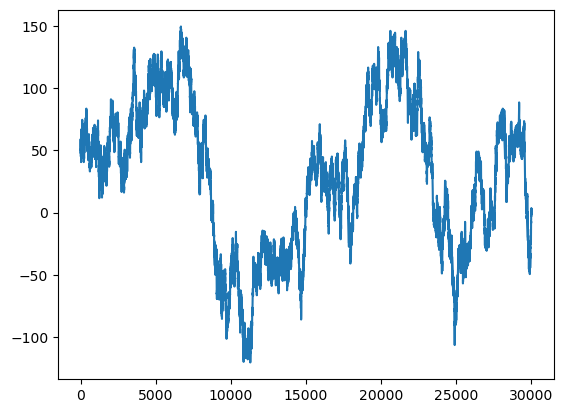

In [269]:
plt.plot((market_data_round_2_all3days_b2.mid_price.values - market_data_round_2_all3days_b2.synthetic_mid.values))

In [272]:
(market_data_round_2_all3days_b2.mid_price.values - market_data_round_2_all3days_b2.synthetic_mid.values).min()

-120.5

In [271]:
(market_data_round_2_all3days_b2.mid_price.values - market_data_round_2_all3days_b2.synthetic_mid.values).max()

149.5

In [270]:
(market_data_round_2_all3days_b2.mid_price.values - market_data_round_2_all3days_b2.synthetic_mid.values).mean()

30.235966666666666

(array([  8.,  37.,  90.,  91.,  77.,  76.,  50.,  56.,  49.,  46.,  74.,
         74.,  86.,  76., 106., 123.,  82.,  98.,  98., 136., 173., 135.,
        183., 189., 314., 455., 387., 441., 373., 386., 451., 526., 584.,
        366., 374., 447., 344., 304., 232., 232., 339., 251., 304., 267.,
        391., 314., 267., 296., 219., 228., 282., 305., 366., 331., 372.,
        547., 455., 585., 490., 528., 667., 556., 654., 595., 499., 562.,
        400., 604., 502., 519., 649., 488., 548., 416., 355., 438., 407.,
        390., 287., 246., 265., 270., 366., 339., 373., 345., 358., 408.,
        302., 311., 218., 224., 215., 173., 164., 160.,  75.,  50.,  25.,
         11.]),
 array([-135.5, -132.8, -130.1, -127.4, -124.7, -122. , -119.3, -116.6,
        -113.9, -111.2, -108.5, -105.8, -103.1, -100.4,  -97.7,  -95. ,
         -92.3,  -89.6,  -86.9,  -84.2,  -81.5,  -78.8,  -76.1,  -73.4,
         -70.7,  -68. ,  -65.3,  -62.6,  -59.9,  -57.2,  -54.5,  -51.8,
         -49.1,  -46.4,  -43.7

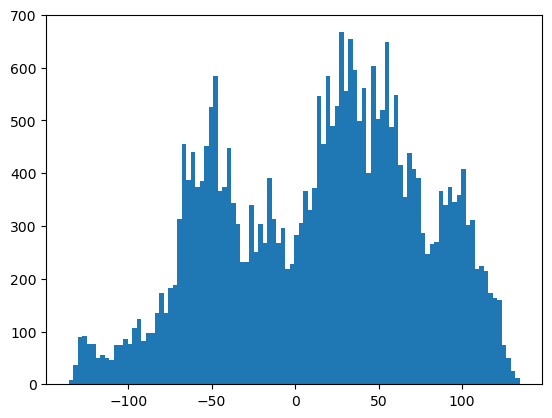

In [278]:
plt.hist((market_data_round_2_all3days_b2.mid_price.values - market_data_round_2_all3days_b2.synthetic_mid.values- 15), bins = 100)

In [241]:
df_basket = df.groupby('timestamp')
df_b1 = df[df['product'] == "PICNIC_BASKET1"]
df_b2 = df[df['product'] == "PICNIC_BASKET2"]


df_b1['synthetic_mid'] = find_synthetic(df, 1, "mid_price")
df_b1['synthetic_bid'] = find_synthetic(df, 1, "bid_price_1")
df_b1['synthetic_ask'] = find_synthetic(df, 1, "ask_price_1")

df_b2['synthetic_mid'] = find_synthetic(df, 2, "mid_price")
df_b2['synthetic_bid'] = find_synthetic(df, 2, "bid_price_1")
df_b2['synthetic_ask'] = find_synthetic(df, 2, "ask_price_1")

/var/folders/kh/zfkqn0cd0cq_vmxgs85vv4qc0000gn/T/ipykernel_430/3858694175.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered1['weighted_value'] = filtered1.apply(lambda row: row[column] * weights.get(row['product'], 0), axis=1)
/var/folders/kh/zfkqn0cd0cq_vmxgs85vv4qc0000gn/T/ipykernel_430/2295873976.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_b1['synthetic_mid'] = find_synthetic(df, 1, "mid_price")
/var/folders/kh/zfkqn0cd0cq_vmxgs85vv4qc0000gn/T/ipykernel_430/3858694175.py:10: Settin

In [240]:
df = pd.read_csv('prices_round_2_day_-1.csv', sep = ";")
df1 = pd.read_csv('prices_round_2_day_0.csv', sep = ";")
df_imc =  pd.read_csv('imc_data.csv')

df.head(10)

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,-1,0,CROISSANTS,4304,112,NaN,NaN,NaN,NaN,4305,112,NaN,NaN,NaN,NaN,4304.5,0.0
1,-1,0,JAMS,6670,66,6669.0,137.0,NaN,NaN,6671,66,6672.0,137.0,NaN,NaN,6670.5,0.0
2,-1,0,SQUID_INK,2005,1,2002.0,31.0,NaN,NaN,2006,31,NaN,NaN,NaN,NaN,2005.5,0.0
3,-1,0,PICNIC_BASKET1,59284,20,59283.0,18.0,NaN,NaN,59294,2,59295.0,36.0,NaN,NaN,59289.0,0.0
4,-1,0,PICNIC_BASKET2,30606,20,30605.0,18.0,NaN,NaN,30612,20,30613.0,18.0,NaN,NaN,30609.0,0.0
5,-1,0,RAINFOREST_RESIN,10002,1,9996.0,2.0,9995.0,29.0,10004,2,10005.0,29.0,NaN,NaN,10003.0,0.0
6,-1,0,DJEMBES,13450,55,NaN,NaN,NaN,NaN,13451,55,NaN,NaN,NaN,NaN,13450.5,0.0
7,-1,0,KELP,2028,1,2026.0,2.0,2025.0,29.0,2029,31,NaN,NaN,NaN,NaN,2028.5,0.0
8,-1,100,PICNIC_BASKET1,59282,17,59281.0,20.0,NaN,NaN,59292,2,59293.0,15.0,59294.0,20.0,59287.0,0.0
9,-1,100,PICNIC_BASKET2,30610,17,30609.0,20.0,NaN,NaN,30616,37,NaN,NaN,NaN,NaN,30613.0,0.0


<Axes: >

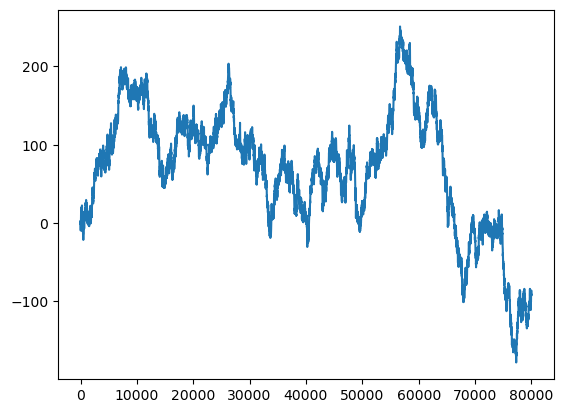

In [242]:
(df_b1.mid_price - df_b1.synthetic_mid).plot()

In [210]:
df_imc

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,1,0,SQUID_INK,1835,1,1834.0,22.0,NaN,NaN,1837,1,1838.0,21.0,NaN,NaN,1836.0,0.000
1,1,0,PICNIC_BASKET1,58706,1,58705.0,10.0,58704.0,27.0,58715,1,58716.0,10.0,58717.0,27.0,58710.5,0.000
2,1,0,PICNIC_BASKET2,30252,11,30251.0,27.0,NaN,NaN,30257,1,30258.0,37.0,NaN,NaN,30254.5,0.000
3,1,0,RAINFOREST_RESIN,9998,3,9996.0,1.0,9995.0,21.0,10004,1,10005.0,21.0,NaN,NaN,10001.0,0.000
4,1,0,KELP,2032,23,NaN,NaN,NaN,NaN,2035,22,NaN,NaN,NaN,NaN,2033.5,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,1,99900,JAMS,6515,175,NaN,NaN,NaN,NaN,6517,175,NaN,NaN,NaN,NaN,6516.0,-1989.125
7996,1,99900,SQUID_INK,1816,28,NaN,NaN,NaN,NaN,1819,28,NaN,NaN,NaN,NaN,1817.5,0.000
7997,1,99900,RAINFOREST_RESIN,9995,28,NaN,NaN,NaN,NaN,10005,28,NaN,NaN,NaN,NaN,10000.0,0.000
7998,1,99900,DJEMBES,13366,78,NaN,NaN,NaN,NaN,13368,78,NaN,NaN,NaN,NaN,13367.0,0.000


In [211]:
df_imc_b2 = df_imc[df_imc['product'] == 'PICNIC_BASKET2']
df_imc_b2['synthetic_midprice'] = find_synthetic(df_imc, 2)

df_imc_b1 = df_imc[df_imc['product'] == 'PICNIC_BASKET1']
df_imc_b1['synthetic_midprice'] = find_synthetic(df_imc, 1)

/var/folders/kh/zfkqn0cd0cq_vmxgs85vv4qc0000gn/T/ipykernel_430/3858694175.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered1['weighted_value'] = filtered1.apply(lambda row: row[column] * weights.get(row['product'], 0), axis=1)
/var/folders/kh/zfkqn0cd0cq_vmxgs85vv4qc0000gn/T/ipykernel_430/2217573601.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_imc_b2['synthetic_midprice'] = find_synthetic(df_imc, 2)
/var/folders/kh/zfkqn0cd0cq_vmxgs85vv4qc0000gn/T/ipykernel_430/3858694175.py:10: Settin

<Axes: >

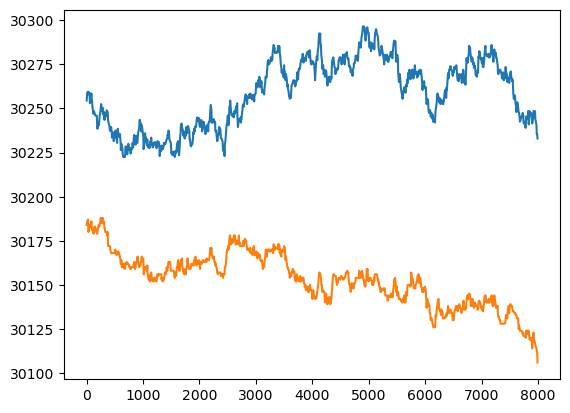

In [151]:
df_imc_b2.mid_price.plot()
df_imc_b2.synthetic_midprice.plot()

<Axes: >

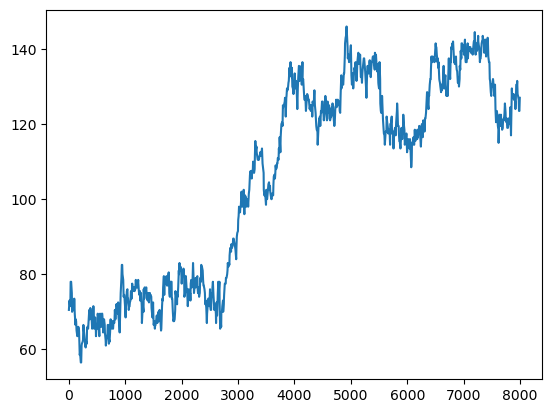

In [280]:
(df_imc_b2.mid_price - df_imc_b2.synthetic_midprice).plot()

<Axes: >

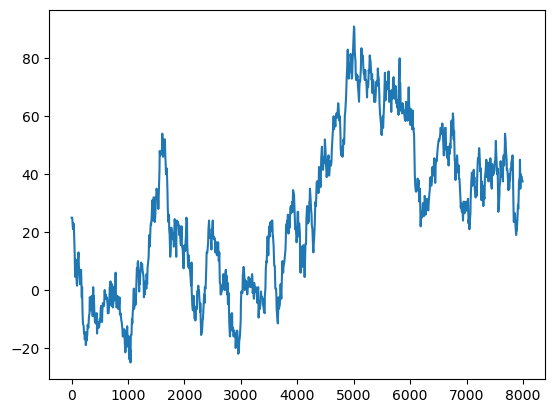

In [244]:
(df_imc_b1.mid_price-df_imc_b1.synthetic_midprice).plot()

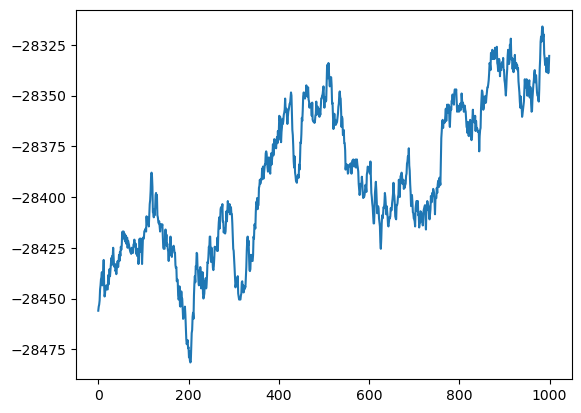

In [245]:
plt.plot(df_imc_b2.mid_price.values - df_imc_b1.mid_price.values)

In [155]:
(df_imc_b2.mid_price.values/df_imc_b1.mid_price.values).mean()

0.5159213497449352

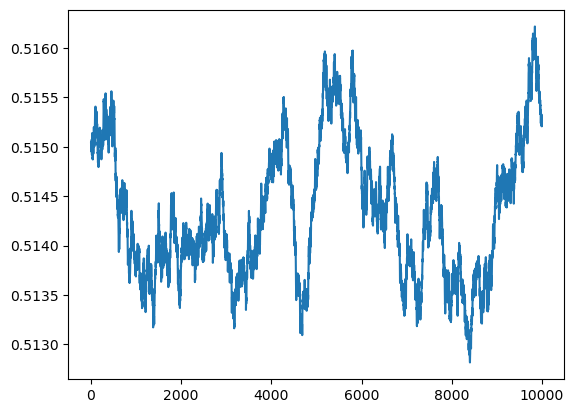

In [181]:
plt.plot((df_b2.mid_price.values/df_b1.mid_price.values))

In [182]:
(df_b2.mid_price.values/df_b1.mid_price.values).mean()

0.5143356442428447

In [212]:
# Day 1 = 0.5146
# Day -1 = 0.5158
# Day 0 = 0.5143

# We want to try and find the price of the basket and check the underlying constituents  

Basket 1 = Djembes + 6 * Croissants + 3 * Jams  
Basket 2 = 4 * Croissants + 2 * Jams

In [213]:
df_basket = df.groupby('timestamp')
df_b1 = df[df['product'] == "PICNIC_BASKET1"]
df_b2 = df[df['product'] == "PICNIC_BASKET2"]


In [216]:
df_b1.mid_price

1        58710.5
12       58710.5
22       58711.5
29       58710.5
34       58703.5
          ...   
79966    58720.5
79972    58719.5
79978    58715.0
79990    58725.5
79998    58718.5
Name: mid_price, Length: 10000, dtype: float64

In [321]:
def find_synthetic(df, basket_id, column = 'mid_price'):
    if basket_id == 1:
        weights = {'CROISSANTS': 6, 'JAMS': 3, 'DJEMBES': 1}
    elif basket_id == 2:
        weights = {'CROISSANTS': 4, 'JAMS': 2}
    elif basket_id == 3:
        weights = {'PICNIC_BASKET2': 1, 'CROISSANTS': 2, 'JAMS': 1, 'DJEMBES': 1}
    elif basket_id == 4:
        weights = {'PICNIC_BASKET1': 1, 'CROISSANTS': -2, 'JAMS': -1, 'DJEMBES': -1}


    filtered1 = df[df['product'].isin(weights.keys())]

    # Apply weights and sum by time
    filtered1['weighted_value'] = filtered1.apply(lambda row: row[column] * weights.get(row['product'], 0), axis=1)
    
    # If you want the total weighted sum per time:
    result_b1 = filtered1.groupby('timestamp')['weighted_value'].sum().reset_index()
    
    return result_b1.weighted_value.values

In [295]:
df.head(15)

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,-1,0,CROISSANTS,4304,112,NaN,NaN,NaN,NaN,4305,112,NaN,NaN,NaN,NaN,4304.5,0.0
1,-1,0,JAMS,6670,66,6669.0,137.0,NaN,NaN,6671,66,6672.0,137.0,NaN,NaN,6670.5,0.0
2,-1,0,SQUID_INK,2005,1,2002.0,31.0,NaN,NaN,2006,31,NaN,NaN,NaN,NaN,2005.5,0.0
3,-1,0,PICNIC_BASKET1,59284,20,59283.0,18.0,NaN,NaN,59294,2,59295.0,36.0,NaN,NaN,59289.0,0.0
4,-1,0,PICNIC_BASKET2,30606,20,30605.0,18.0,NaN,NaN,30612,20,30613.0,18.0,NaN,NaN,30609.0,0.0
5,-1,0,RAINFOREST_RESIN,10002,1,9996.0,2.0,9995.0,29.0,10004,2,10005.0,29.0,NaN,NaN,10003.0,0.0
6,-1,0,DJEMBES,13450,55,NaN,NaN,NaN,NaN,13451,55,NaN,NaN,NaN,NaN,13450.5,0.0
7,-1,0,KELP,2028,1,2026.0,2.0,2025.0,29.0,2029,31,NaN,NaN,NaN,NaN,2028.5,0.0
8,-1,100,PICNIC_BASKET1,59282,17,59281.0,20.0,NaN,NaN,59292,2,59293.0,15.0,59294.0,20.0,59287.0,0.0
9,-1,100,PICNIC_BASKET2,30610,17,30609.0,20.0,NaN,NaN,30616,37,NaN,NaN,NaN,NaN,30613.0,0.0


In [296]:
df_b1['synth_b2_mid'] = find_synthetic(df, 3, "mid_price")


/var/folders/kh/zfkqn0cd0cq_vmxgs85vv4qc0000gn/T/ipykernel_430/637548881.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered1['weighted_value'] = filtered1.apply(lambda row: row[column] * weights.get(row['product'], 0), axis=1)
/var/folders/kh/zfkqn0cd0cq_vmxgs85vv4qc0000gn/T/ipykernel_430/3959740656.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_b1['synth_b2_mid'] = find_synthetic(df, 3, "mid_price")


In [297]:
df_b1

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,...,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss,synthetic_mid,synthetic_bid,synthetic_ask,synth_b2_mid
3,-1,0,PICNIC_BASKET1,59284,20,59283.0,18.0,NaN,NaN,59294,...,59295.0,36.0,NaN,NaN,59289.0,0.0,59289.0,59284,59294,59339.0
8,-1,100,PICNIC_BASKET1,59282,17,59281.0,20.0,NaN,NaN,59292,...,59293.0,15.0,59294.0,20.0,59287.0,0.0,59288.5,59283,59294,59342.5
22,-1,200,PICNIC_BASKET1,59288,13,59287.0,20.0,NaN,NaN,59299,...,59300.0,20.0,NaN,NaN,59293.5,0.0,59290.5,59284,59297,59345.5
26,-1,300,PICNIC_BASKET1,59289,2,59288.0,17.0,59287.0,24.0,59298,...,59299.0,17.0,59300.0,24.0,59293.5,0.0,59293.0,59286,59300,59351.5
36,-1,400,PICNIC_BASKET1,59290,2,59289.0,15.0,59288.0,28.0,59294,...,59299.0,2.0,59300.0,15.0,59292.0,0.0,59301.5,59295,59308,59356.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79966,-1,999500,PICNIC_BASKET1,59222,2,59221.0,12.0,59220.0,21.0,59231,...,59232.0,12.0,59233.0,21.0,59226.5,0.0,59318.0,59311,59325,59273.5
79968,-1,999600,PICNIC_BASKET1,59228,2,59227.0,12.0,59226.0,29.0,59237,...,59238.0,12.0,59239.0,29.0,59232.5,0.0,59318.5,59312,59325,59275.0
79977,-1,999700,PICNIC_BASKET1,59221,39,NaN,NaN,NaN,NaN,59233,...,NaN,NaN,NaN,NaN,59227.0,0.0,59318.5,59312,59325,59275.5
79988,-1,999800,PICNIC_BASKET1,59222,11,59221.0,22.0,NaN,NaN,59233,...,59234.0,22.0,NaN,NaN,59227.5,0.0,59318.5,59312,59325,59274.5


# Basket 1 vs Basket 2 + 2 C + 1 J + 1 D

In [316]:
all_3_b1 = market_data_round_2_all3days[market_data_round_2_all3days['product'] == 'PICNIC_BASKET1']
all_3_b1['synth_b1'] = find_synthetic(market_data_round_2_all3days, 3, "mid_price")

/var/folders/kh/zfkqn0cd0cq_vmxgs85vv4qc0000gn/T/ipykernel_430/637548881.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered1['weighted_value'] = filtered1.apply(lambda row: row[column] * weights.get(row['product'], 0), axis=1)
/var/folders/kh/zfkqn0cd0cq_vmxgs85vv4qc0000gn/T/ipykernel_430/2666984329.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_3_b1['synth_b1'] = find_synthetic(market_data_round_2_all3days, 3, "mid_price")


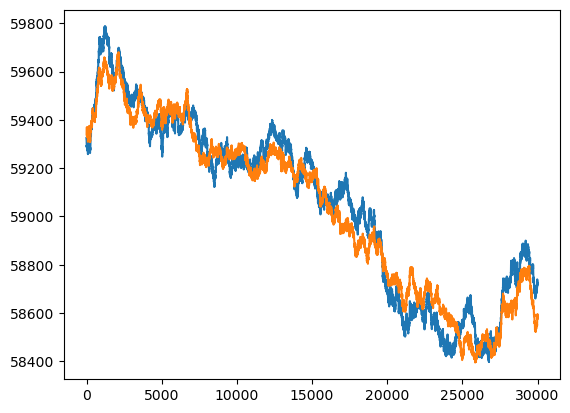

In [318]:
plt.plot(all_3_b1.mid_price.values)
plt.plot(all_3_b1.synth_b1.values)

Text(0.5, 1.0, 'Basket 1 price minus synthetic basket 1 price')

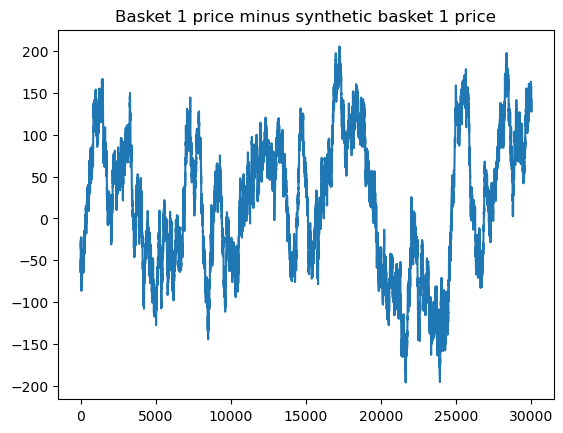

In [320]:
plt.plot(all_3_b1.mid_price.values - all_3_b1.synth_b1.values)
plt.title("Basket 1 price minus synthetic basket 1 price")

# Now doing basket 2 vs basket 1 constituents - probably same

In [322]:
all_3_b2 = market_data_round_2_all3days[market_data_round_2_all3days['product'] == 'PICNIC_BASKET2']
all_3_b2['synth_b2'] = find_synthetic(market_data_round_2_all3days, 4, "mid_price")

/var/folders/kh/zfkqn0cd0cq_vmxgs85vv4qc0000gn/T/ipykernel_430/337556695.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered1['weighted_value'] = filtered1.apply(lambda row: row[column] * weights.get(row['product'], 0), axis=1)
/var/folders/kh/zfkqn0cd0cq_vmxgs85vv4qc0000gn/T/ipykernel_430/1012446813.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_3_b2['synth_b2'] = find_synthetic(market_data_round_2_all3days, 4, "mid_price")


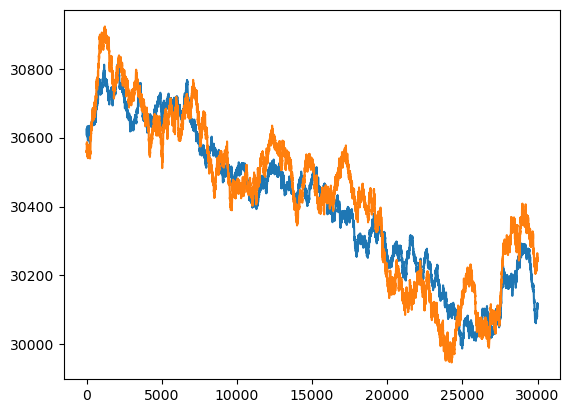

In [323]:
plt.plot(all_3_b2.mid_price.values)
plt.plot(all_3_b2.synth_b2.values)

<Axes: >

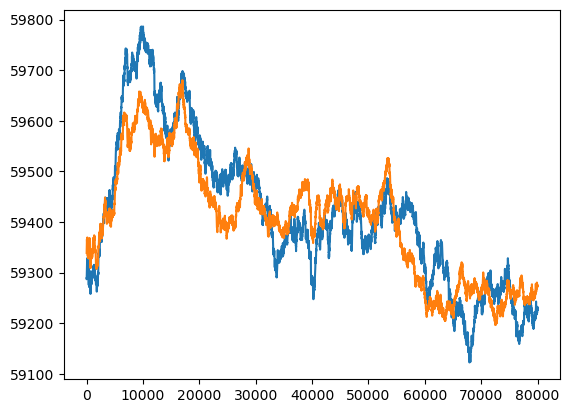

In [324]:
df_b1.mid_price.plot()
df_b1.synth_b2_mid.plot()

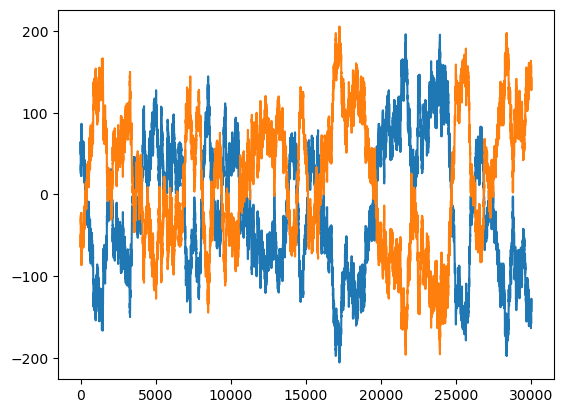

In [326]:
plt.plot(all_3_b2.mid_price.values - all_3_b2.synth_b2.values, label = 'black')
plt.plot(all_3_b1.mid_price.values - all_3_b1.synth_b1.values, label = 'red')


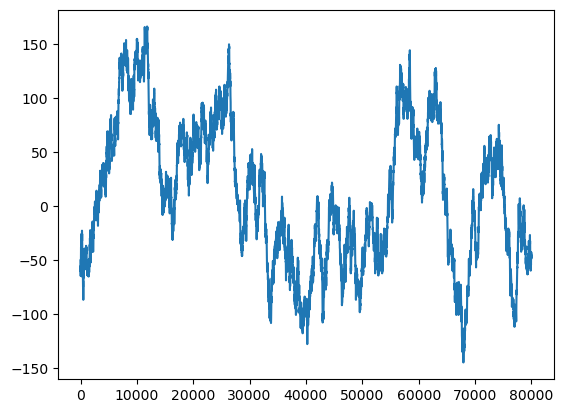

In [300]:
plt.plot(df_b1.mid_price - df_b1.synth_b2_mid)

In [218]:
find_synthetic(df_imc, 2)

/var/folders/kh/zfkqn0cd0cq_vmxgs85vv4qc0000gn/T/ipykernel_430/3858694175.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered1['weighted_value'] = filtered1.apply(lambda row: row[column] * weights.get(row['product'], 0), axis=1)


array([30184., 30186., 30187., 30187., 30180., 30181., 30184., 30183.,
       30183., 30183., 30186., 30184., 30181., 30181., 30181., 30179.,
       30181., 30183., 30183., 30182., 30182., 30180., 30181., 30179.,
       30180., 30181., 30184., 30184., 30183., 30184., 30186., 30188.,
       30186., 30185., 30185., 30188., 30186., 30186., 30186., 30182.,
       30182., 30180., 30180., 30180., 30180., 30178., 30180., 30172.,
       30172., 30172., 30172., 30172., 30171., 30169., 30168., 30168.,
       30168., 30168., 30168., 30168., 30168., 30168., 30168., 30170.,
       30168., 30168., 30167., 30167., 30168., 30169., 30169., 30168.,
       30168., 30166., 30166., 30163., 30162., 30164., 30160., 30161.,
       30160., 30160., 30162., 30160., 30159., 30160., 30162., 30162.,
       30163., 30162., 30162., 30162., 30162., 30161., 30161., 30160.,
       30160., 30159., 30159., 30160., 30160., 30160., 30160., 30160.,
       30162., 30163., 30161., 30159., 30160., 30162., 30163., 30163.,
      

In [219]:
find_synthetic(df, 1, "mid_price")

/var/folders/kh/zfkqn0cd0cq_vmxgs85vv4qc0000gn/T/ipykernel_430/3858694175.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered1['weighted_value'] = filtered1.apply(lambda row: row[column] * weights.get(row['product'], 0), axis=1)


array([58685.5, 58688. , 58690. , ..., 58587.5, 58589. , 58578.5])

In [220]:
find_synthetic(df, 1, "bid_price_1")

/var/folders/kh/zfkqn0cd0cq_vmxgs85vv4qc0000gn/T/ipykernel_430/3858694175.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered1['weighted_value'] = filtered1.apply(lambda row: row[column] * weights.get(row['product'], 0), axis=1)


array([58676, 58681, 58685, ..., 58582, 58582, 58572])

In [221]:
df_basket = df.groupby('timestamp')
df_b1 = df[df['product'] == "PICNIC_BASKET1"]
df_b2 = df[df['product'] == "PICNIC_BASKET2"]


df_b1['synthetic_mid'] = find_synthetic(df, 1, "mid_price")
df_b1['synthetic_bid'] = find_synthetic(df, 1, "bid_price_1")
df_b1['synthetic_ask'] = find_synthetic(df, 1, "ask_price_1")

df_b2['synthetic_mid'] = find_synthetic(df, 2, "mid_price")
df_b2['synthetic_bid'] = find_synthetic(df, 2, "bid_price_1")
df_b2['synthetic_ask'] = find_synthetic(df, 2, "ask_price_1")

/var/folders/kh/zfkqn0cd0cq_vmxgs85vv4qc0000gn/T/ipykernel_430/3858694175.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered1['weighted_value'] = filtered1.apply(lambda row: row[column] * weights.get(row['product'], 0), axis=1)
/var/folders/kh/zfkqn0cd0cq_vmxgs85vv4qc0000gn/T/ipykernel_430/3423877649.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_b1['synthetic_mid'] = find_synthetic(df, 1, "mid_price")
/var/folders/kh/zfkqn0cd0cq_vmxgs85vv4qc0000gn/T/ipykernel_430/3858694175.py:10: Settin

<Axes: >

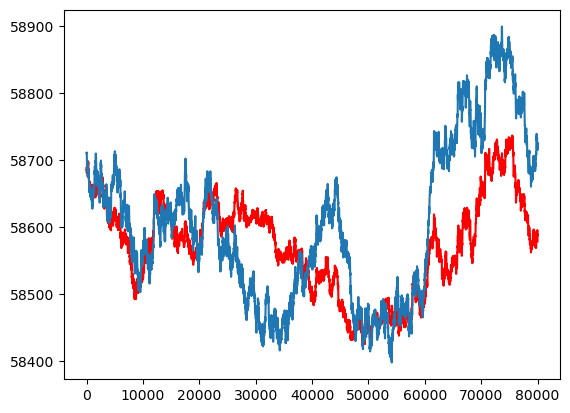

In [222]:
df_b1.synthetic_mid.plot(color = "red")
df_b1.mid_price.plot()

<Axes: >

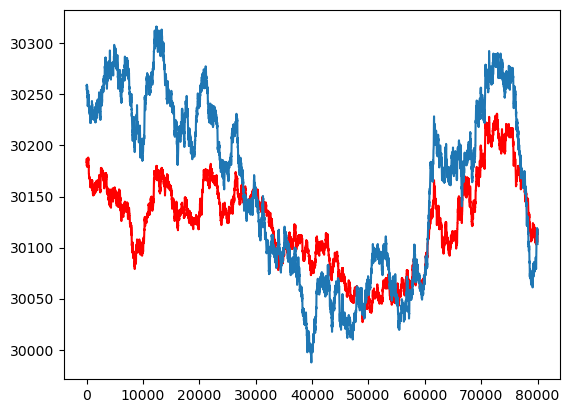

In [223]:
df_b2.synthetic_mid.plot(color = "red")
df_b2.mid_price.plot()

<Axes: >

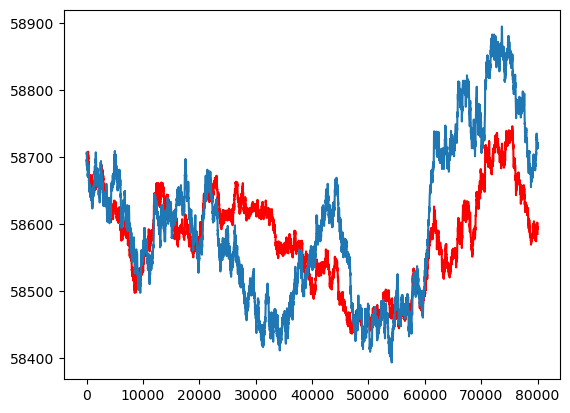

In [224]:
# Check synthetic ask and actual bid
df_b1.synthetic_ask.plot(color = "red")
df_b1.bid_price_1.plot()

<Axes: >

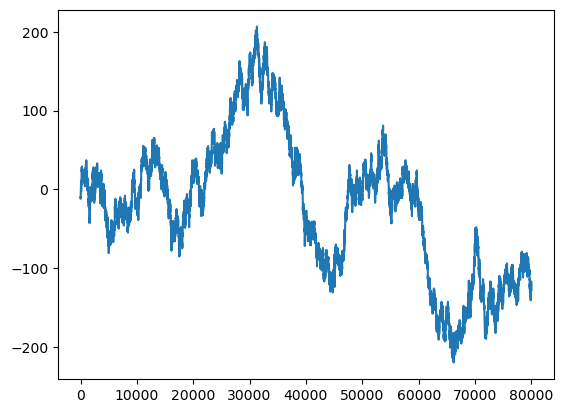

In [225]:
(df_b1.synthetic_ask - df_b1.bid_price_1).plot()

<Axes: >

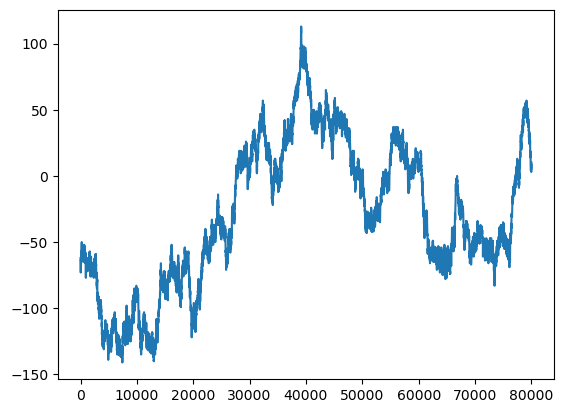

In [226]:
(df_b2.synthetic_ask - df_b2.bid_price_1).plot()

<Axes: >

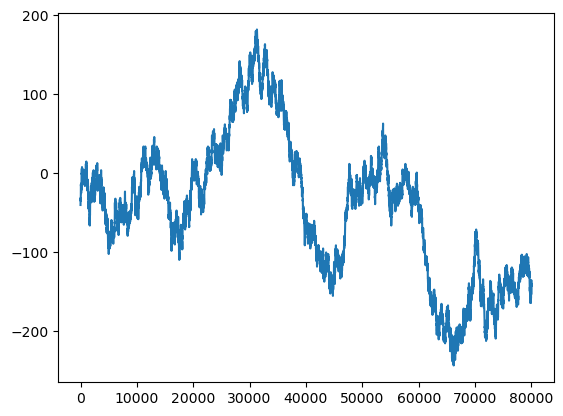

In [227]:
(df_b1.synthetic_bid - df_b1.ask_price_1).plot()

<Axes: >

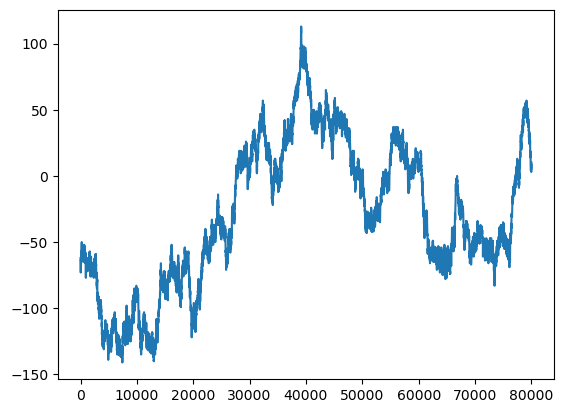

In [228]:
(df_b2.synthetic_ask - df_b2.bid_price_1).plot()

<Axes: >

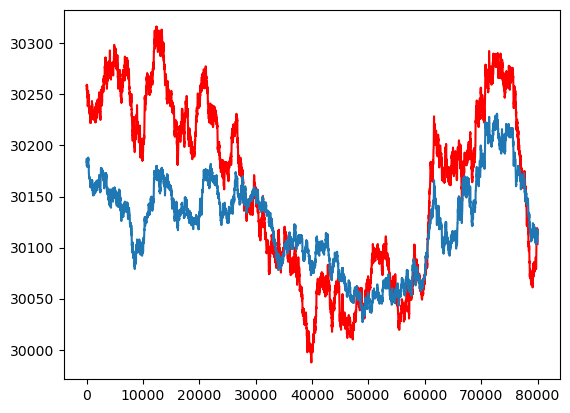

In [229]:
df_b2.mid_price.plot(color = 'red')
df_b2.synthetic_mid.plot()

<Axes: >

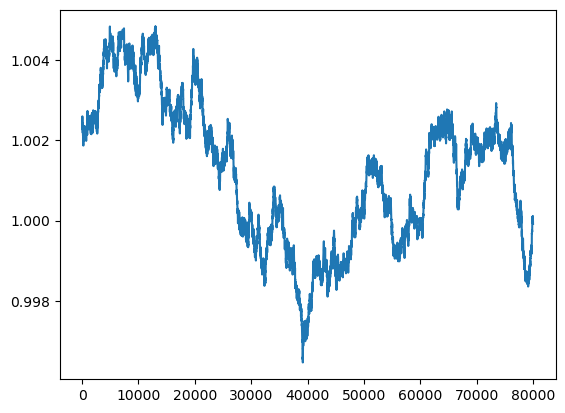

In [230]:
(df_b2.mid_price/df_b2.synthetic_mid).plot()

In [231]:
(df_b2.mid_price - df_b2.synthetic_mid).max()

146.0

In [232]:
(df_b2.mid_price - df_b2.synthetic_mid).mean()

36.46695

In [233]:
df_b2

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss,synthetic_mid,synthetic_bid,synthetic_ask
2,1,0,PICNIC_BASKET2,30252,12,30251.0,27.0,NaN,NaN,30258,39,NaN,NaN,NaN,NaN,30255.0,0.0,30184.0,30178,30190
13,1,100,PICNIC_BASKET2,30255,13,30254.0,20.0,NaN,NaN,30260,1,30261.0,32.0,NaN,NaN,30257.5,0.0,30186.0,30182,30190
23,1,200,PICNIC_BASKET2,30256,1,30255.0,41.0,NaN,NaN,30261,16,30262.0,26.0,NaN,NaN,30258.5,0.0,30187.0,30184,30190
28,1,300,PICNIC_BASKET2,30256,30,NaN,NaN,NaN,NaN,30262,14,30263.0,16.0,NaN,NaN,30259.0,0.0,30186.0,30182,30190
33,1,400,PICNIC_BASKET2,30255,18,30254.0,15.0,NaN,NaN,30261,33,NaN,NaN,NaN,NaN,30258.0,0.0,30180.0,30176,30184
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79967,1,999500,PICNIC_BASKET2,30115,18,30114.0,25.0,NaN,NaN,30120,1,30121.0,42.0,NaN,NaN,30117.5,0.0,30114.0,30110,30118
79973,1,999600,PICNIC_BASKET2,30112,47,NaN,NaN,NaN,NaN,30118,19,30119.0,28.0,NaN,NaN,30115.0,0.0,30113.0,30110,30116
79979,1,999700,PICNIC_BASKET2,30111,1,30110.0,45.0,NaN,NaN,30113,3,30116.0,16.0,30117.0,30.0,30112.0,0.0,30113.0,30110,30116
79991,1,999800,PICNIC_BASKET2,30110,2,30109.0,41.0,NaN,NaN,30115,16,30116.0,27.0,NaN,NaN,30112.5,0.0,30114.0,30110,30118


<Axes: >

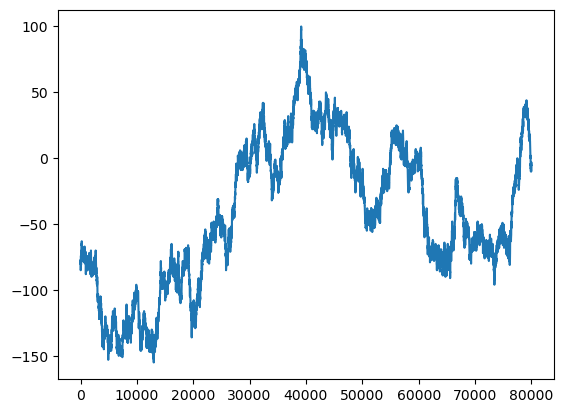

In [234]:
(df_b2.synthetic_bid - df_b2.ask_price_1).plot()

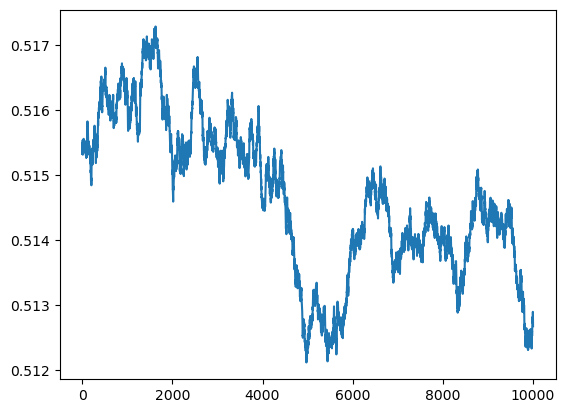

In [235]:
plt.plot((df_b2.mid_price.values/df_b1.mid_price.values))

<Axes: >

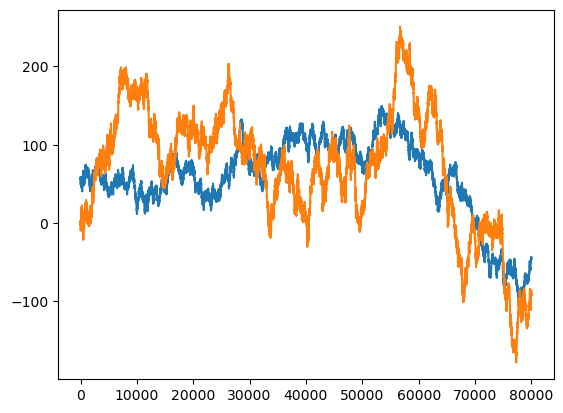

In [283]:
(df_b2.mid_price - df_b2.synthetic_mid).plot()

(df_b1.mid_price - df_b1.synthetic_mid).plot()

<Axes: >

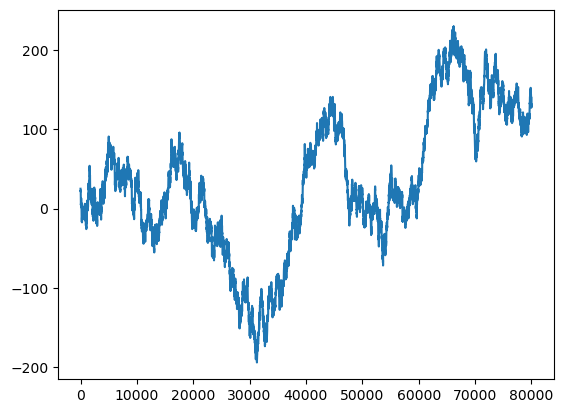